In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_moons
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [40]:
X,y = make_moons(n_samples=200, noise=0.25, random_state=42)

<AxesSubplot:>

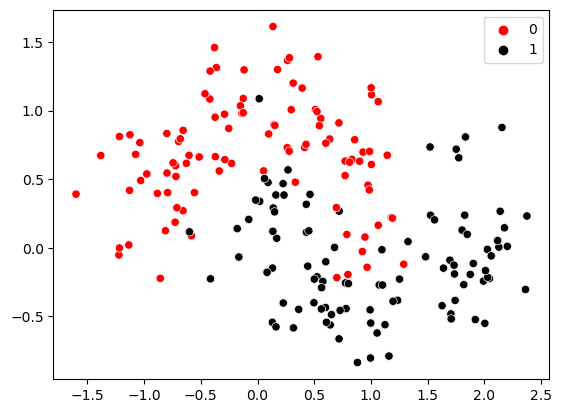

In [42]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y, palette=['red','black'])

In [43]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [44]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
adam = Adam(learning_rate=0.01)

model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

In [27]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 924us/step


<AxesSubplot:>

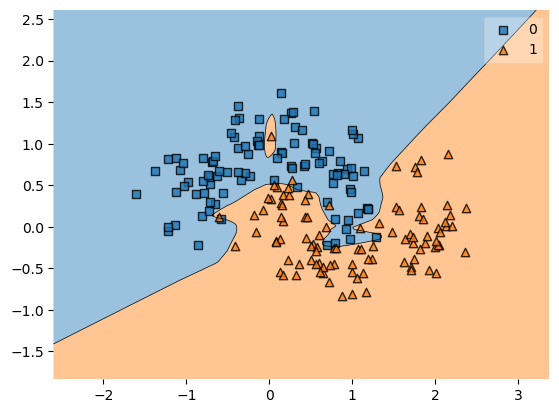

In [46]:
plot_decision_regions(X, y, clf=model1)

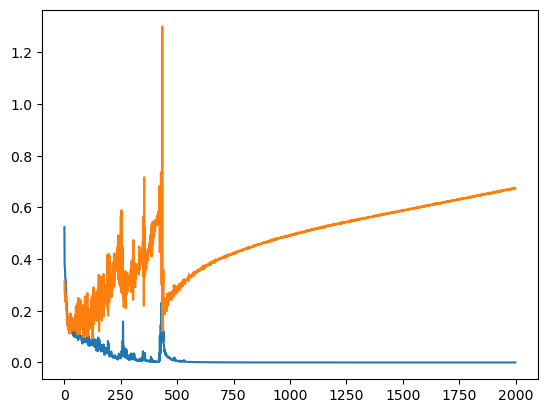

In [51]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# Model with Regularisation

In [52]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1, activation='sigmoid'))

In [53]:
adam = Adam(learning_rate=0.01)

model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 9s 903us/step


<AxesSubplot:>

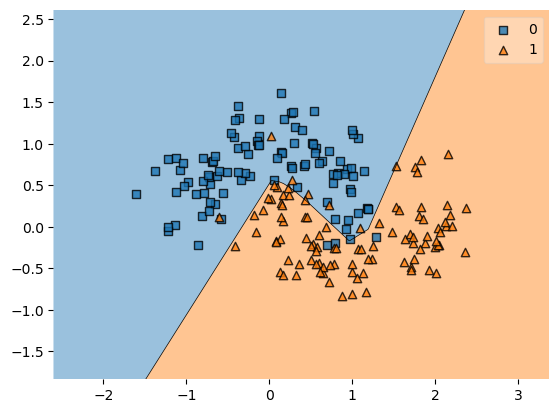

In [54]:
plot_decision_regions(X, y, clf=model1)

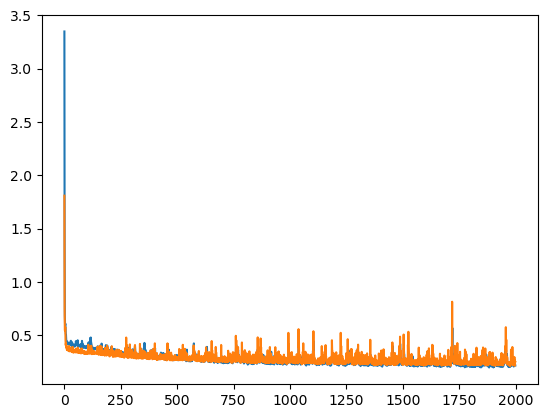

In [55]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])